<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> PROGRAMA DE VERÃO FGV EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# Regression
## This Lab Class requires the file <font color=blue> ESC2013_RMSP_CEM.csv </font> 

In [13]:
import pandas as pd
import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

columns = ['TIP_DEP','BIBLIO','QD_ESP_C','QD_ESP_D',
           'AP5EF_07','AP9EF_07','AP5EF_08','AP9EF_08',
          'AP5EF_09','AP9EF_09','AP5EF_10','AP9EF_10',
          'AP5EF_11','AP9EF_11','AP5EF_12','AP9EF_12',
          'AP5EF_13','AP9EF_13',
          'MAT05_AF','LP05_AF','MAT07_AF','LP07_AF','MAT09_AF','LP09_AF',
          'MAT11_AF','LP11_AF','MAT13_AF','LP13_AF',
          'IDEB13AF']

###########
# reading data_frame
###########
df = pd.read_csv('ESC2013_RMSP_CEM.csv',usecols=columns)

###########
# extracting only municipal and estadual schools
###########
df = df.loc[(df['TIP_DEP']=='Municipal') | (df['TIP_DEP']=='Estadual')]
print(df.shape)

###########
# cleaning the data 
###########
# Removing schools with no score in IDEB13AF
df.dropna(subset=['IDEB13AF'],inplace=True)
print(df.shape)

# handling missing data
df[columns[4:]]=df[columns[4:]].fillna(df[columns[4:]].median())
df[columns[1:]]=df[columns[1:]].fillna(0.0)


(5708, 29)
(2120, 29)


In [14]:
#############
# Setting the training data
#############
chosen_columns = columns[1:-1] #da primeira a penultima.

X_data = df[chosen_columns].values
Y_data = df[columns[-1]].values

#############
# Making the regression
#############

linear_regr = linear_model.LinearRegression()
ridge_regr = linear_model.Ridge(alpha=1.0)
lasso_regr = linear_model.Lasso(alpha=1.0)
linear_regr.fit(X_data, Y_data)
ridge_regr.fit(X_data, Y_data)
lasso_regr.fit(X_data, Y_data)

print("Betas Linear:",linear_regr.coef_,linear_regr.intercept_)
print("Betas Ridge:",ridge_regr.coef_,ridge_regr.intercept_)
print("Betas Lasso:",lasso_regr.coef_,lasso_regr.intercept_)

#############
# Computing the Error
#############

print("MSE Linear: %.5f" % np.mean(np.subtract(linear_regr.predict(X_data), Y_data) ** 2))
print("MSE Ridge: %.5f" % np.mean(np.subtract(ridge_regr.predict(X_data), Y_data) ** 2))
print("MSE Lasso: %.5f" % np.mean(np.subtract(lasso_regr.predict(X_data).reshape(-1,1), Y_data) ** 2))

Betas Linear: [ 3.40541057e-04  8.11752035e-03  4.62141068e-03 -8.90344949e-04
  4.39181327e-04  5.77840263e-04 -3.47966750e-04 -8.11919679e-04
 -6.72381219e-04 -4.15248647e-04 -2.37495622e-05  1.30731649e-02
  1.19874972e-02  6.94017348e-04  1.01522142e-03  2.37404228e-03
  2.01307180e-02 -1.72530407e-03  2.33385317e-03 -1.49717623e-04
  1.05553838e-03 -4.51571794e-04  4.94779129e-04 -3.23713313e-04
  1.62999563e-04  1.49619040e-02  1.58690544e-02] -7.765147403623884
Betas Ridge: [ 3.39333296e-04  8.08271869e-03  4.60135664e-03 -8.90248017e-04
  4.39143195e-04  5.77531132e-04 -3.47935688e-04 -8.12086526e-04
 -6.72401019e-04 -4.15411102e-04 -2.37657838e-05  1.30719162e-02
  1.19875622e-02  6.94420754e-04  1.01523316e-03  2.37384497e-03
  2.01305899e-02 -1.72512262e-03  2.33360843e-03 -1.49553432e-04
  1.05555514e-03 -4.51512551e-04  4.94731127e-04 -3.23636989e-04
  1.63009036e-04  1.49618910e-02  1.58689772e-02] -7.764983601482615
Betas Lasso: [ 0.          0.          0.          0.  

### Regularization parameter is important 

(2120,)
Ridge min: (red) 0.06252544814004209
Lasso min: (green) 0.01564994443490825


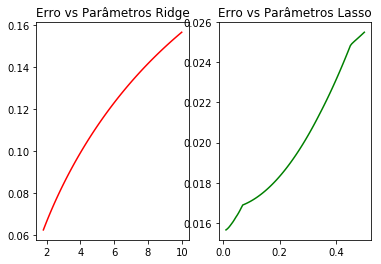

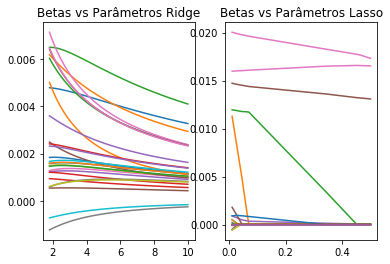

In [20]:
n_alphas = 100                       # number of regularization coefficients
a_ridge =  np.linspace(1.8,10,n_alphas)  # 100 values between 0.01 and 2
erl_ridge = []                      # list of errors for ridge regression
coefs_ridge = []                    # list of coefficients 
for i in a_ridge:
    ridge_regr = linear_model.Ridge(alpha=i,normalize=True)
    #ridge_regr = linear_model.Ridge(alpha=i)
    ridge_regr.fit(X_data, Y_data)
    erl_ridge.append(np.mean(np.subtract(ridge_regr.predict(X_data), Y_data) ** 2)) # MSE ridge
    coefs_ridge.append(ridge_regr.coef_)
    
a_lasso =  np.linspace(0.01,0.5,n_alphas)  # 50 values between 0.01 and 10
erl_lasso = []                      # list of errors for lasso regression
coefs_lasso = []
print(Y_data.shape)
for i in a_lasso:
    #lasso_regr = linear_model.Lasso(alpha=i,normalize=True)
    lasso_regr = linear_model.Lasso(alpha=i)
    lasso_regr.fit(X_data, Y_data)
    erl_lasso.append(np.mean(np.subtract(lasso_regr.predict(X_data).reshape(-1,1), Y_data.reshape(-1,1)) ** 2)) # MSE lasso
    coefs_lasso.append(lasso_regr.coef_)

plt.figure(1)
plt.subplot(121)
plt.title('Erro vs Parâmetros Ridge')
plt.plot(a_ridge,erl_ridge,color='red')
plt.subplot(122)
plt.title('Erro vs Parâmetros Lasso')
plt.plot(a_lasso,erl_lasso,color='green')

plt.figure(2)
plt.subplot(121)
plt.title('Betas vs Parâmetros Ridge')
matridge_coefs = np.asarray(coefs_ridge).reshape(n_alphas,len(chosen_columns))
for i in range(matridge_coefs.shape[1]):
    plt.plot(a_ridge,matridge_coefs[:,i],label=chosen_columns[i])
#plt.legend()    

plt.subplot(122)
plt.title('Betas vs Parâmetros Lasso')
matlasso_coefs = np.asarray(coefs_lasso).reshape(n_alphas,len(chosen_columns))
for i in range(matlasso_coefs.shape[1]):
    plt.plot(a_lasso,matlasso_coefs[:,i],label=chosen_columns[i])
#plt.legend(loc=2) 

print("Ridge min: (red)", min(erl_ridge))
print("Lasso min: (green)", min(erl_lasso))

In [26]:
#Recalculando com os novos parâmetros:

ridge_regr = linear_model.Ridge(alpha=2.0)
lasso_regr = linear_model.Lasso(alpha=0.05)
ridge_regr.fit(X_data, Y_data)
lasso_regr.fit(X_data, Y_data)
print("MSE Ridge: %.5f" % np.mean(np.subtract(ridge_regr.predict(X_data), Y_data) ** 2))
print("MSE Lasso: %.5f" % np.mean(np.subtract(lasso_regr.predict(X_data).reshape(-1,1), Y_data) ** 2))

MSE Ridge: 0.01556
MSE Lasso: 0.56278


### Using cross validation

MSE Linear: 0.01565


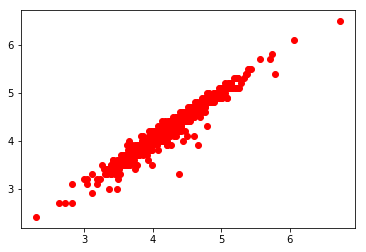

In [15]:
from sklearn.model_selection import train_test_split

# --------------------
# K-fold CV  -- sempre rodar num loop p garantir diversas amostras.
# 
# --------------------
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.7, test_size=0.3, random_state=3)
ts = Y_test.shape[0]

linear_regr = linear_model.LinearRegression()
linear_regr.fit(X_train, Y_train)

# Predicting
Y_pred = linear_regr.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(Y_pred, Y_test, color='red')

# Prediction error
print("MSE Linear: %.5f" % np.mean(np.subtract(Y_pred, Y_test) ** 2))

EXERCÍCIO:

* Fazer cross-validation (train-test split) para "melhores" parâmetros do ridge e do lasso.
* Comparar os melhores modelos.